In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
train_data = pd.read_csv('data/train_ctrUa4K.csv')
test_data = pd.read_csv('data/test_lAUu6dG.csv')

train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train_clean = train_data[
    (train_data['Credit_History'].notna()) &
    (train_data['Self_Employed'].notna()) &
    (train_data['LoanAmount'].notna()) &
    (train_data['Gender'].notna()) &
    (train_data['Loan_Amount_Term'].notna()) &
    (train_data['Dependents'].notna())
]
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [5]:
test_clean = test_data[
    (test_data['Credit_History'].notna()) &
    (test_data['Self_Employed'].notna()) &
    (test_data['LoanAmount'].notna()) &
    (test_data['Gender'].notna()) &
    (test_data['Loan_Amount_Term'].notna()) &
    (test_data['Dependents'].notna())
]
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


In [6]:
train_clean['Credit_History'].unique()

array([1., 0.])

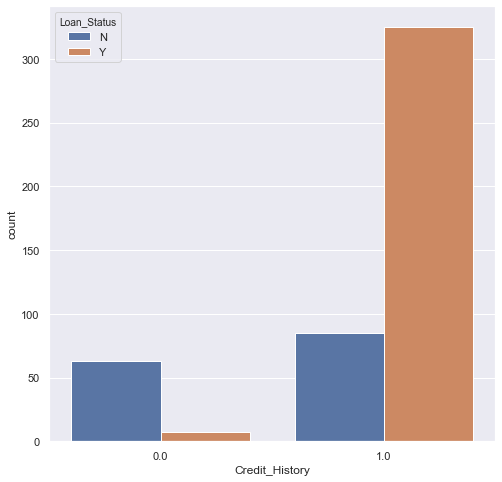

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(data=train_clean, x='Credit_History', hue='Loan_Status')

### Categorical variables in numerical format

In [8]:
rep_gender = {
    'Female': 0,
    'Male': 1
}

rep_education = {
    'Not Graduate': 0,
    'Graduate': 1
}

rep_property = {
    'Rural': 0,
    'Semiurban': 1,
    'Urban': 2
}

rep_loan_status = {
    'N': 0,
    'Y': 1
}

rep_yes_no = {
    'No': 0,
    'Yes': 1
}

# Creating dictionary to replace values
replace_dict = {
    'Gender': rep_gender,
    'Married': rep_yes_no,
    'Education': rep_education,
    'Self_Employed': rep_yes_no,
    'Property_Area': rep_property,
    'Loan_Status': rep_loan_status
}

train_trans = train_clean.replace(replace_dict)
train_trans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


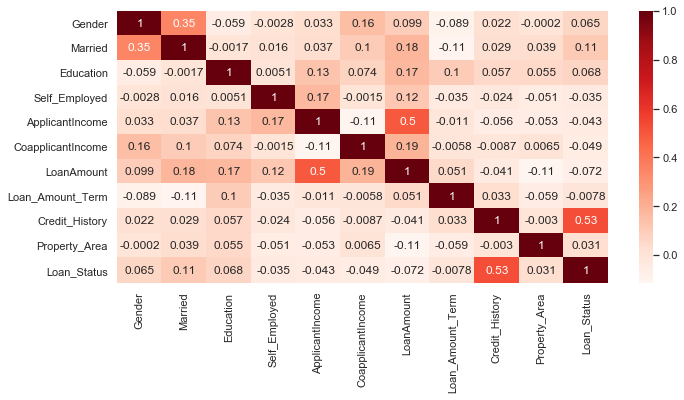

In [9]:
corr_map = train_trans.corr()
plt.figure(figsize=(11, 5))
sns.heatmap(corr_map, cmap='Reds', annot=True)

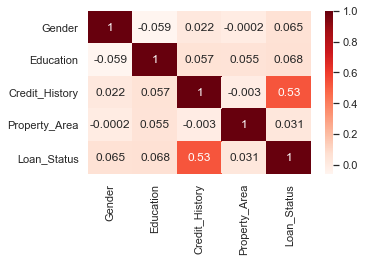

In [10]:
train_filter = train_trans.drop(
    ['Married', 'Self_Employed', 'ApplicantIncome',  'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID', 'Dependents'],
    axis=1
)

corr_map = train_filter.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_map, cmap='Reds', annot=True);

In [11]:
from sklearn.model_selection import train_test_split

X = train_filter.drop('Loan_Status', axis=1)
y = train_filter['Loan_Status']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier()
clas.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
y_pred = clas.predict(X_valid)

comp_data = {
    'valid': y_valid,
    'pred': y_pred
}

df_compare = pd.DataFrame(data=comp_data)
df_compare['pred_correct'] = np.where(df_compare['valid'] == df_compare['pred'], True, False)
print('Accuracy: %.2f%%' % ((df_compare[df_compare['pred_correct'] == True].shape[0] / df_compare.shape[0]) * 100))
print('Correct: %d registers' % df_compare[df_compare['pred_correct'] == True]['pred_correct'].count())
print('Wrong: %d registers' % df_compare[df_compare['pred_correct'] == False]['pred_correct'].count())

Accuracy: 77.08%
Correct: 74 registers
Wrong: 22 registers


In [14]:
test_trans = test_data.replace(replace_dict)

test_ids = test_trans['Loan_ID']

test_filter = test_trans.drop(
    ['Married', 'Self_Employed', 'ApplicantIncome',  'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID', 'Dependents'],
    axis=1
)

test_filter['Gender'] = test_filter['Gender'].fillna(1)
test_filter['Credit_History'] = test_filter['Credit_History'].fillna(1.0)

y_test = clas.predict(test_filter)

sub_raw = pd.DataFrame({
    'Loan_ID': test_ids,
    'Loan_Status': y_test
})

rep_yes_no_inv = {
    0: 'N',
    1: 'Y'
}

submission = sub_raw.replace({'Loan_Status': rep_yes_no_inv})
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [15]:
submission.to_csv('data/sub_mod1.csv', index=False)